# Exploring Diamonds: Statistical Insights and Visualizations in Pricing and Quality

In this data analysis project using the "diamonds-3.csv" dataset, I took charge from the initial step of loading the data into a Pandas DataFrame. I then selected two variables, 'price' and 'depth,' providing a detailed explanation of their statistical summaries, including mean, median, and more. Following this, I created a bar chart illustrating the frequency of diamonds grouped by their cut types ('Ideal,' 'Premium,' 'Very Good,' 'Good,' 'Fair'). Subsequently, I crafted a scatterplot revealing the relationship between carat and price, showcasing a positive correlation. Calculating the Pearson Correlation coefficient further validated the strong positive linear relationship between carat and price. Additionally, I designed histograms depicting the price distribution based on the quality of the cut for each cut type ('Ideal,' 'Good,' 'Premium,' 'Very Good,' 'Fair'). Lastly, I performed 2-sample t-tests to determine if there were statistically significant differences in prices between 'Good' and 'Very Good' cuts and 'Premium' and 'Ideal' cuts, providing insightful conclusions based on the p-values. Overall, this comprehensive analysis delves into various facets of the diamond dataset, presenting visualizations and statistical insights to unravel patterns and relationships within the data.

## 1. Loading the data into a pandas dataframe: diamonds.csv Download diamonds.csv 

In [1]:
import pandas as pd

diamonds_csv = 'diamonds-3.csv'
df = pd.read_csv(diamonds_csv)

print(df)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

## 2. Selecting two variables and explaining its statistical summary, e.g. mean, median, min, max, etc. 

In [2]:
# the median finds the price that is in the middle of the dataset
price_median = df['price'].median()
print("the median of price is: ", price_median)

#the mean find the average price for the diamonds in the dataset
depth_mean = df['depth'].mean()
print("the mean of depth is: ", depth_mean)



the median of price is:  2401.0
the mean of depth is:  61.749404894327036


## 3. Creating a bar chart that shows the frequency of diamonds grouped by cut


The bar given below displays the frequency of diamonds categorized according to their cut type. Each of the bars given bar corresponds to a different cut type(Ideal, Premium, Very Good, Good, Fair). Also, the height of the bar indicates the number of diamonds present in relation to their cut type. Consequently, this chart allows for a quick and clear understanding of the relative frequency of each cut type within the dataset.

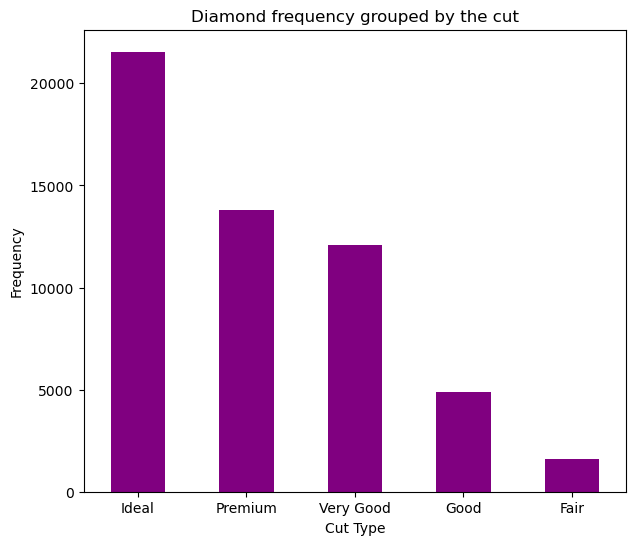

In [3]:
import matplotlib.pyplot as plt

diamond_frequency = df['cut'].value_counts()

plt.figure(figsize=(7, 6))
diamond_frequency.plot(kind='bar', color='purple')
plt.title("Diamond frequency grouped by the cut")
plt.xlabel('Cut Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.show()


## 4. Creating a scatterplot that shows the relationship between carat and price

The scatterplot given below gives the relationship between carat and price. Each of the green dots represent a diamond from the dataset

As can be seen from the graph, there is a correlation between carat and price. This is because the weight of the diamond is directly proportional to the price of the diamond. This can be seen from the positive slope that starts from the bottom left of the graph and goes up to the top-right.

There is some variability in the price of the diamond, meaning that there may be other factors effecting it.

Although a positive correlation exists between carat weight and diamond price, there are instances where diamonds with lower carat weights have higher prices which are most likely influenced by factors beyond weight, such as diamond quality.

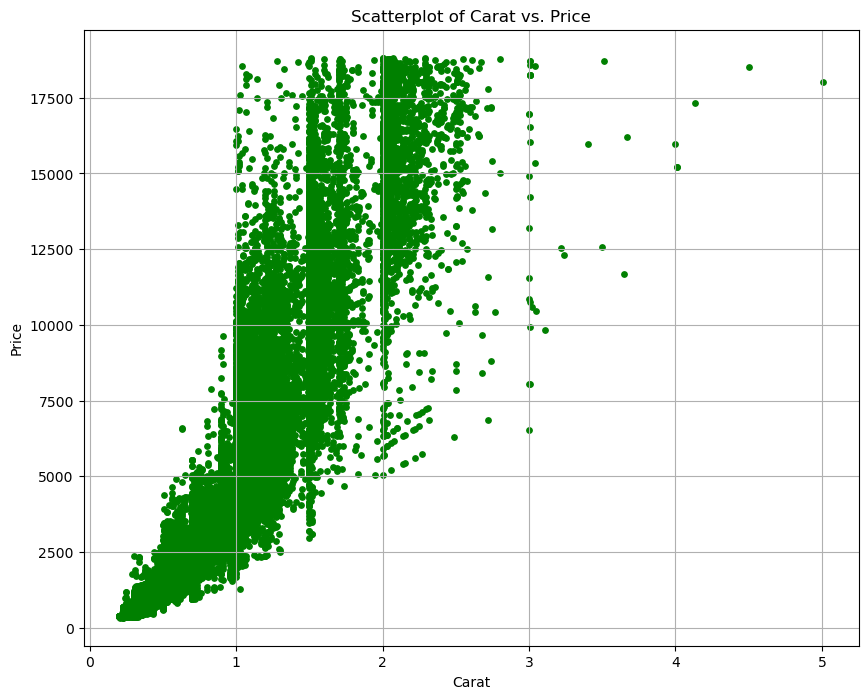

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df['carat'], df['price'], c='green', s = 15)
plt.title('Scatterplot of Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)

plt.show()


## 5. Calculating the Pearson Correlation coefficient of carat and price

The correlation coefficient turned out to be 0.92, suggesting that there is a strong positive linear relationship between the price and the carat. This points out to the fact that as the carat increases, the price of the diamond also increases. This is also how things work in the industry: larger diamonds are generally more expensive.

The low p-value, which is 0 in this case, indicates that the correlation is statistically significant. This further means that it is not likely for it to have happened at random. Consequently, all the evidence presented supports the conclusion that there is a strong relationship between the price and the carat.

In [5]:
import scipy.stats as stats


corr, p_value = stats.pearsonr(df['carat'], df['price'])
print('The correlation coefficient is: ', corr)
print('The p-value is: ', p_value)

The correlation coefficient is:  0.9215913011935642
The p-value is:  0.0


## 6. Creating a histogram that shows the distribution of prices based on the quality of the cut

The graph is a little right-skewed. This means that there ar more diamonds in the lower price range and less diamonds in the higher price range. 

The highest bar, with more than 5000 count, is the mode of the graph and represents the most common price. On the other hand, there are some outliers with exceptional high prices.

In general, the graph displays the distribution of prices in the Ideal category. It showcases that most of the diamonds have a common type of price range, with some exceptions.

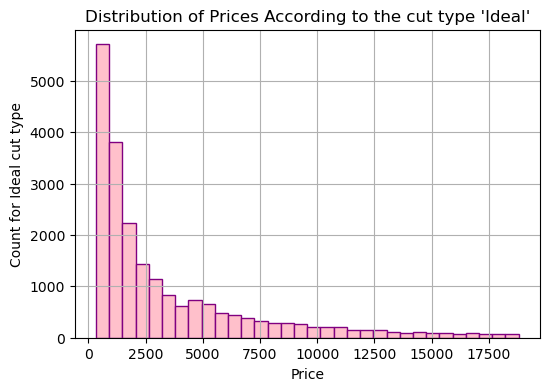

In [6]:
# graph for the "Ideal" Cut

ideal_cut = df[df['cut'] == 'Ideal']

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.hist(ideal_cut['price'], edgecolor='purple', bins=32, color='pink')
plt.title("Distribution of Prices According to the cut type 'Ideal'")
plt.xlabel('Price')
plt.ylabel('Count for Ideal cut type')
plt.show()


The graph for the Good type is a bit different than the Ideal one, as it is not skewed in any way. It also has a mode which showcases the common price for the diamonds.

Even though there seems to be a decreasing exponential line, we cannot say thay with certainty as there are bars that are more evenly spread out for the prices ranges of 300-500. Just like the Ideal cut, with the increasing higher prices, the count decreases significantly.

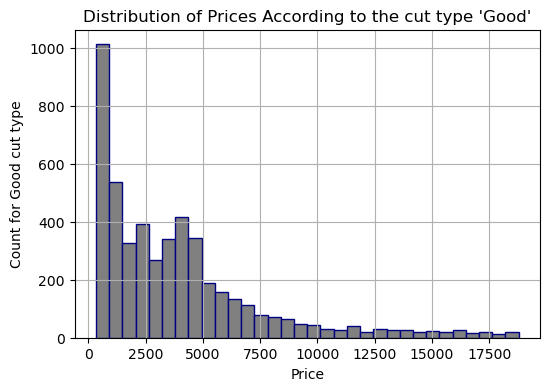

In [7]:
# graph for the "Good" Cut

ideal_cut = df[df['cut'] == 'Good']

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.hist(ideal_cut['price'], edgecolor='navy', bins=32, color='grey')
plt.title("Distribution of Prices According to the cut type 'Good'")
plt.xlabel('Price')
plt.ylabel('Count for Good cut type')
plt.show()


This graph resembles the Ideal graph as it has somewhat of a right-skew. The mode is the cheapest "premium" cut with a count of more than 2500. This also resembles the Good cut in that with some diamonds having lower prices and a noticeable number of diamonds with medium prices.

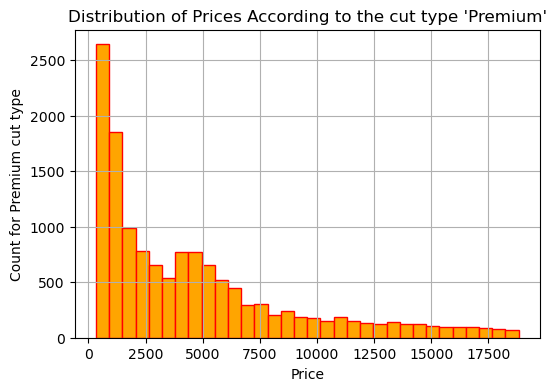

In [8]:
# graph for the "Premium" Cut

ideal_cut = df[df['cut'] == 'Premium']

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.hist(ideal_cut['price'], edgecolor='red', bins=32, color='orange')
plt.title("Distribution of Prices According to the cut type 'Premium'")
plt.xlabel('Price')
plt.ylabel('Count for Premium cut type')
plt.show()

-the histogram for the "Very Good" cut type shows a somewhat right skew to the right. 
-the prices are not evenly spread out but there is a decrease in the count as the prices get higher. 
-The mode which is the highest bar is the bar on the very left and representst the count for the lowest and the most common diamond.

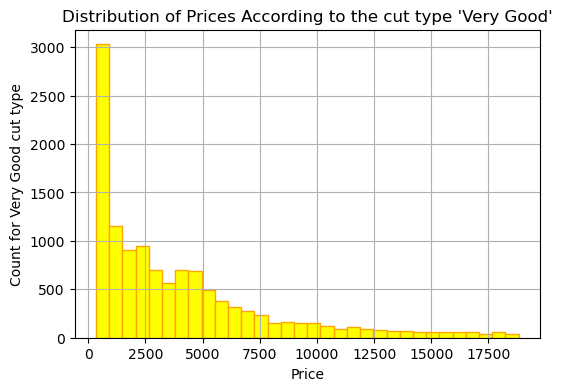

In [9]:
# graph for the "Very Good" Cut

ideal_cut = df[df['cut'] == 'Very Good']

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.hist(ideal_cut['price'], edgecolor='orange', bins=32, color='yellow')
plt.title("Distribution of Prices According to the cut type 'Very Good'")
plt.xlabel('Price')
plt.ylabel('Count for Very Good cut type')
plt.show()

-The graph does not show any kind of skew. It has more of a unimodal type.
-the distribution of prices for "Fair" cut diamonds exhibits a broader range of prices, with a some diamonds having lower prices and a noticeable number of diamonds with medium to higher prices.
-The mode of the bar graph is not the bar with the lowest price but it is the bar that is closer to the medium price range.

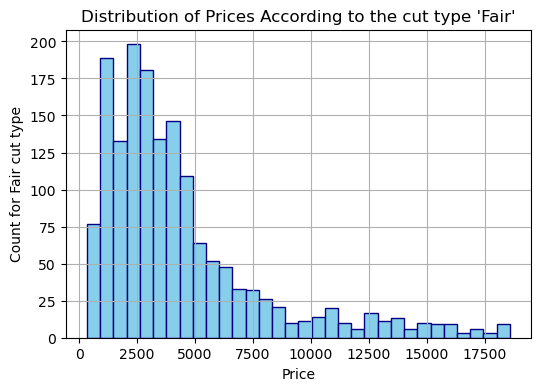

In [10]:
# graph for the "Fair" Cut

ideal_cut = df[df['cut'] == 'Fair']

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.hist(ideal_cut['price'], edgecolor='navy', bins=32, color='skyblue')
plt.title("Distribution of Prices According to the cut type 'Fair'")
plt.xlabel('Price')
plt.ylabel('Count for Fair cut type')
plt.show()

## 7. Using a 2-sample t-test, determining if there is a statistical difference between the price of diamonds with a cut that is considered: 'Good' vs 'Very Good' and 'Premium' vs 'Ideal'

In [11]:
# 2-sample t-test for 'Good' vs 'Very Good' 
#To sum it up, based on the 2-sample t-test with a significance level of 0.05, there is no statistical 
#evidence to suggest that the prices of diamonds with Good and Very Good cuts are significantly different.

sample_good = df[df['cut'] == 'Good']['price']
sample_very_good = df[df['cut'] == 'Very Good']['price']

alpha = 0.05
t_stat, p_value = stats.ttest_ind(sample_good, sample_very_good)

if p_value < alpha:
    print("The p_value is:", p_value,".The prices of the cuts 'Good' and 'Very Good' are statistically different.")
else:
    print("The p_value is:", p_value,".The prices of the cuts 'Good' and 'Very Good' are not statistically different.")


The p_value is: 0.41876516590101354 .The prices of the cuts 'Good' and 'Very Good' are not statistically different.


In [12]:
# 2-sample t-test for 'Premium' vs 'Ideal'

sample_premium = df[df['cut'] == 'Premium']['price']
sample_ideal = df[df['cut'] == 'Ideal']['price']

alpha = 0.05
t_stat, p_value = stats.ttest_ind(sample_premium, sample_ideal)

if p_value < alpha:
    print("The p_value is:", p_value,".The prices of the cuts 'Good' and 'Very Good' are statistically different.")
else:
    print("The p_value is:", p_value,".The prices of the cuts 'Good' and 'Very Good' are not statistically different.")



The p_value is: 8.585274269295433e-144 .The prices of the cuts 'Good' and 'Very Good' are statistically different.
